In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [105]:
# loading data
col= ['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Gtype']

df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv', names = col)
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Gtype
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
# Describing the columns

Id number

RI: refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

Al: Aluminum

Si: Silicon

K: Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Gtype: Type of glass


In [4]:
# summary understanding of problem statement

Here we have a supervised machine learning problem based on classification models. The target variable is Gtype and others are features

# Data exploration and Cleaning; feature engineering and selection

In [106]:
# dividing data by glass type

Types = []

for i in df['Gtype']:
    if i in range(1,5):
        Types.append('window')
    else:
        Types.append('non-window ')
df['Types'] = Types
df     

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Gtype,Types
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,window
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,window
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,window
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,window
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,window
...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,non-window
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,non-window
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,non-window
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,non-window


In [107]:
Type = []

for i in df['Types']:
    if i == 'window':
        Type.append(0)
    else:
        Type.append(1)
df['Type'] = Type
df   

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Gtype,Types,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,window,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,window,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,window,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,window,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,window,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,non-window,1
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,non-window,1
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,non-window,1
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,non-window,1


In [109]:
df.drop(['Gtype','Types'], axis = 1, inplace = True)

In [110]:
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,1
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


In [311]:
# let’s set Id number as index
df1 = df.set_index('Id number')

In [312]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,1
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1


In [113]:
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [114]:
df1.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id number,,,,,,,,,,
210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,1
211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,1
212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,1
213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,1
214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,1


we observe from head and tail that all data are float type

In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


all features are float and there is no missing value

In [116]:
# cross-checking data types
df1.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [117]:
# cross-checking data types
df1.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      2
dtype: int64

Ba and Fe have very limited unique values. we should consider whether to change them into object type

In [120]:
# cross-checking missing values
no_nul = []
for i in df1.columns:
    if df1[i].value_counts().sum() == df1.shape[0]:
        no_nul.append(i)

no_nul


['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

we can confirm that there is no missing value

In [121]:
# summary statistics of the data
df1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,0.238318
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.427053
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,0.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


- outliers are suspected in the columns Al, K, Ca, Ba, Fe beacuse there is a big gap between the 3rd quartile and the maximum
- 0 as minimum for Mg and K can be understood as no Mg and no K in the glass chemical composition.
- the columns Ba and Fe behave like categorical data, because their min, first quartile, median and third quatile are null(0). This reinforces the idea to convertthem into object type

In [122]:
# checking for duplicate

df1.loc[df1.duplicated(), :]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id number,,,,,,,,,,
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,0


In [313]:
# let’s remove the only duplicate row

a = df1.drop(index=40)

In [314]:
a.duplicated().sum()

0

In [315]:
df1=a

In [126]:
# checking outliers

def box(columns, data, a, b, c, d):
    plt.figure(figsize = (15, 8), facecolor = 'purple')
    j = 1
    for i in columns:
        if j<=a:
            ax = plt.subplot(b, c, j)
            sns.boxplot(data[i], palette = 'colorblind')
            plt.xlabel(i, fontsize = d)
        j+=1
        
        plt.tight_layout()

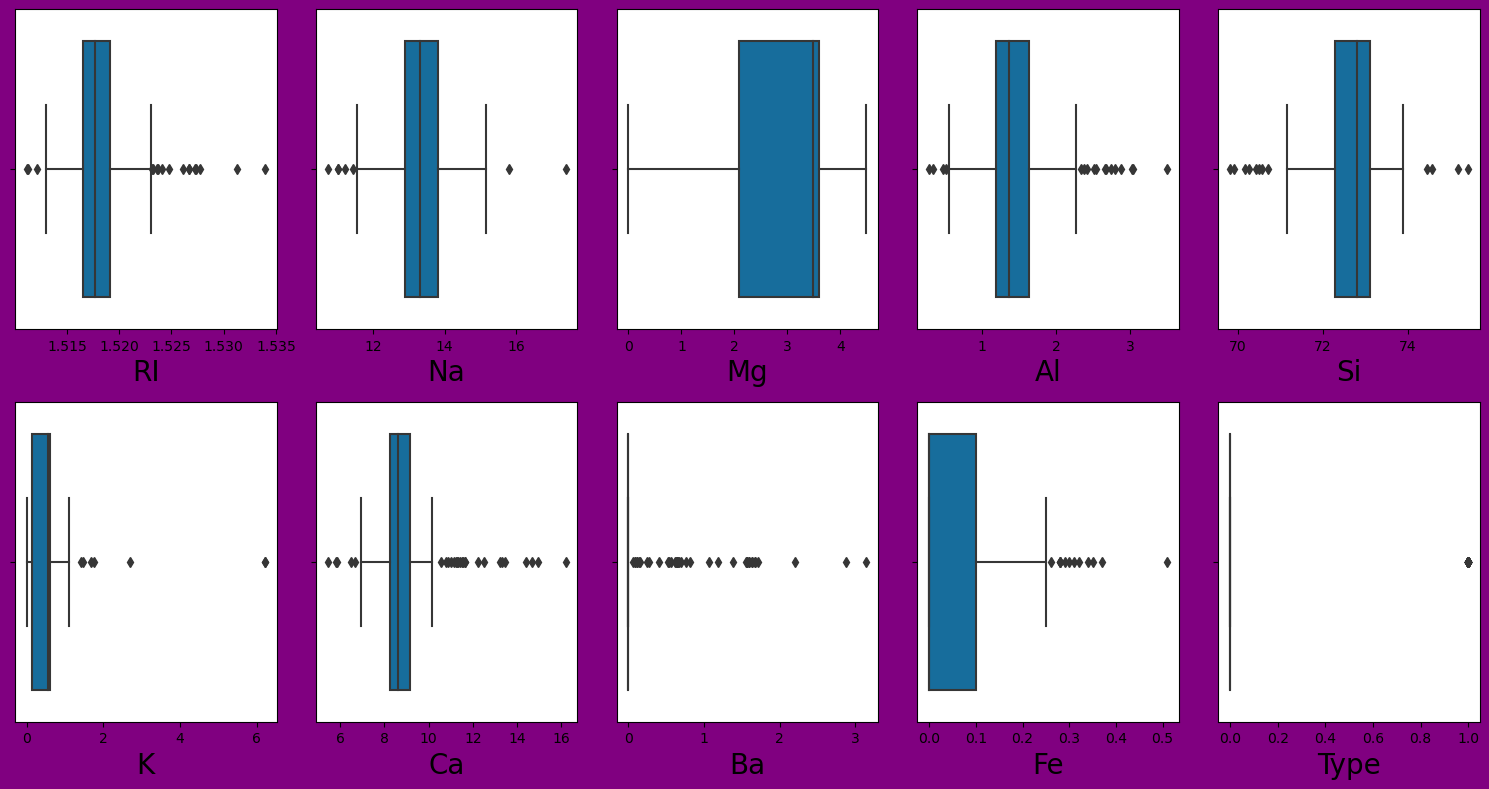

In [127]:

col = []
for i in df1.columns:
    col.append(i)


box(col, df1,10, 2, 5, 20)

In [24]:
# let’s convert Ba and Fe into object

In [128]:
df1.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [131]:
col_n = []
for i in df1.columns:
    if df1[i].dtypes != 'object':     
        col_n.append(i)
col_n 

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [317]:
# removing outliers 

coln = df1[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]

from scipy.stats import zscore

   
z = np.abs(zscore(coln))

z


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Id number,,,,,,,,,
1,0.879840,0.289558,1.257238,0.706370,1.133248,0.673480,0.143466,0.353808,0.588301
2,0.243816,0.596403,0.639311,0.180863,0.097037,0.028962,0.790201,0.353808,0.588301
3,0.716412,0.154546,0.604596,0.182950,0.433746,0.167073,0.825349,0.353808,0.588301
4,0.227291,0.238216,0.701798,0.322346,0.058368,0.109149,0.516041,0.353808,0.588301
5,0.306608,0.164573,0.653197,0.423405,0.550299,0.078457,0.621487,0.353808,0.588301
...,...,...,...,...,...,...,...,...,...
210,0.699888,0.903249,1.860172,2.891336,0.058368,0.642789,0.158812,1.778672,0.588301
211,0.494986,1.860605,1.860172,1.092483,0.524398,0.765554,0.389506,2.844912,0.588301
212,0.760865,1.173272,1.860172,1.153118,0.990612,0.765554,0.361387,2.945501,0.588301


In [318]:
df2 = df1[(z<3).all(axis = 1)]

print((df1.shape[0]-df2.shape[0])/df1.shape[0]*100)

9.389671361502346


In [319]:
df2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,1
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,1
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1


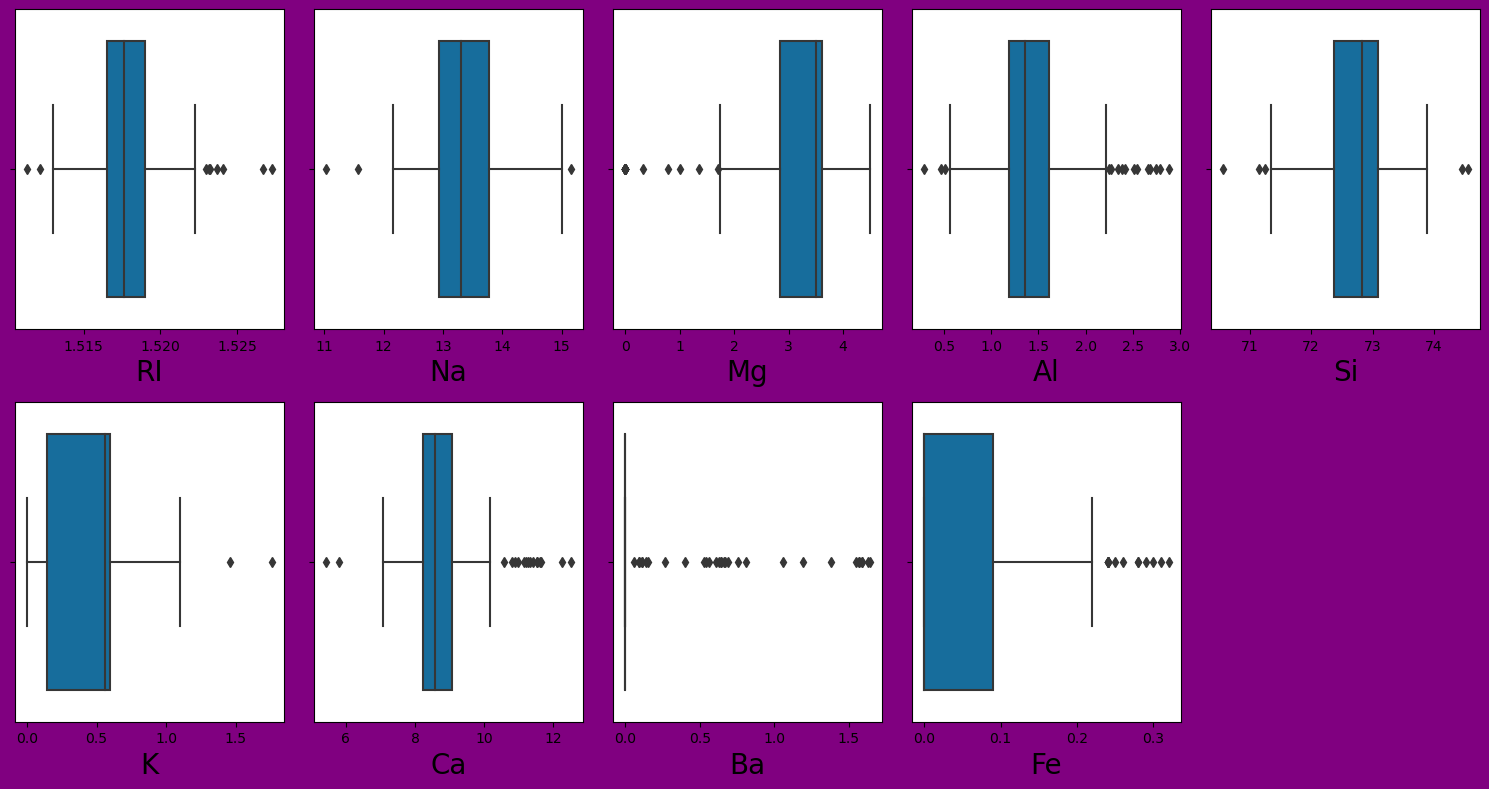

In [140]:
col = []
for i in df2.columns:
    col.append(i)


box(col, df2,9, 2, 5, 20)

In [141]:
# removing outliers using IQR

t = df1[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
Q1 = t.quantile(0.25)

Q3 = t.quantile(0.75)

IQR = Q3-Q1

n = Q1-1.5*IQR
m = Q3+1.5*IQR

In [142]:
df0 = df1[~((df1 > m) | (df1 < n)).any(axis =1)]

print((df1.shape[0]-df0.shape[0])/df1.shape[0]*100)

36.61971830985916


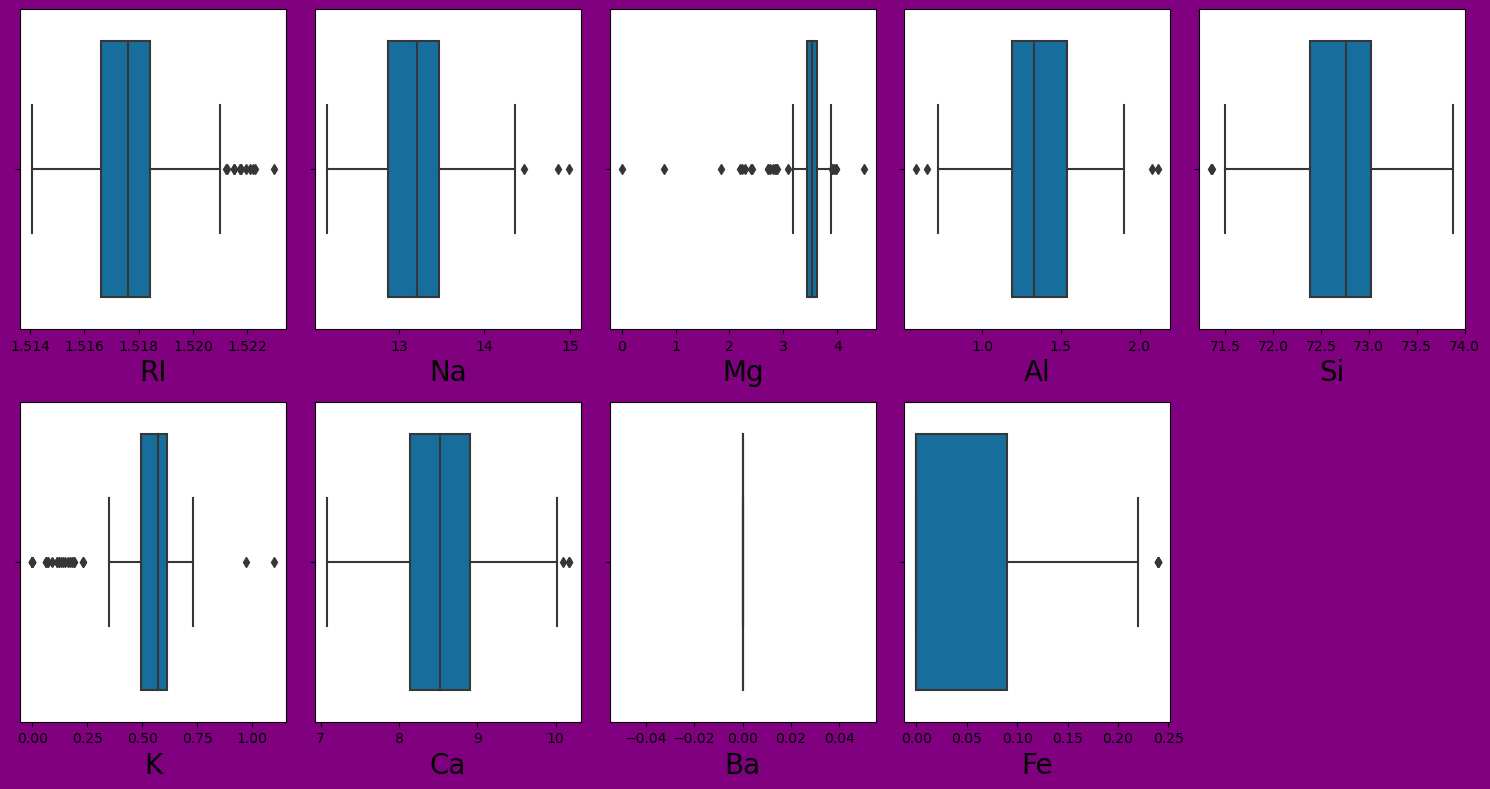

In [144]:
col = []
for i in df0.columns:
    col.append(i)


box(col, df0,9, 2, 5, 20)

We choose zscore as it gives acceptable data lost

In [320]:
df2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,1
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,1
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1


In [321]:
df2.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [147]:
df2.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [148]:
df2.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,193.000000,193.00000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,1.518040,13.41285,2.875130,1.427668,72.725544,0.433212,8.820777,0.123990,0.051865,0.207254
std,0.002275,0.67260,1.310355,0.439568,0.582325,0.282063,0.990259,0.357943,0.085924,0.406393
min,1.511310,11.03000,0.000000,0.290000,70.570000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516510,12.94000,2.850000,1.190000,72.380000,0.140000,8.240000,0.000000,0.000000,0.000000
50%,1.517630,13.30000,3.500000,1.360000,72.830000,0.560000,8.580000,0.000000,0.000000,0.000000
75%,1.518980,13.78000,3.610000,1.610000,73.090000,0.600000,9.070000,0.000000,0.090000,0.000000
max,1.527250,15.15000,4.490000,2.880000,74.550000,1.760000,12.500000,1.640000,0.320000,1.000000


In [149]:
# plotting distribution 

def distplot(columns, data, k, t, a, b, c, d):
    plt.figure(figsize = (k, t), facecolor = 'purple')
    j = 1
    for i in columns:
        if j<=a:
            ax = plt.subplot(b, c, j)
            sns.distplot(data[i], color = 'r')
            plt.xlabel(i, fontsize = d)
        j+=1
        
        plt.tight_layout()
            

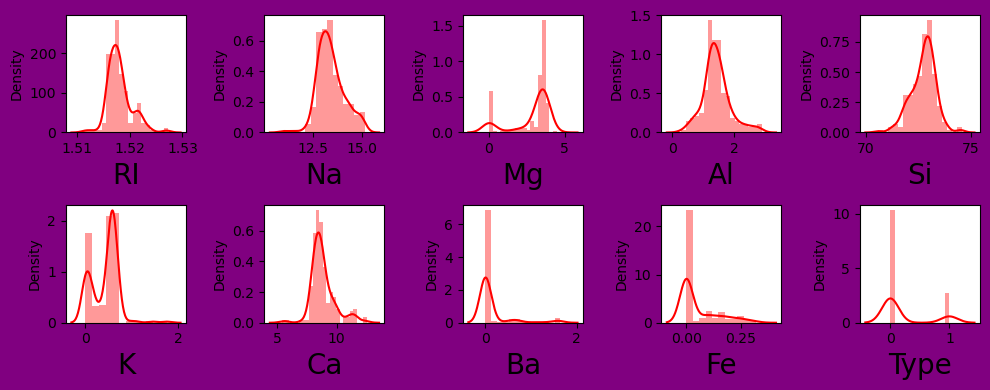

In [150]:
col = []
for i in df2.columns:
    col.append(i)
distplot(col, df2, 10, 4, 10, 2, 5, 20)

In [151]:
df2.skew()

RI      0.972271
Na      0.384484
Mg     -1.521807
Al      0.700499
Si     -0.436027
K       0.295387
Ca      1.089590
Ba      3.178256
Fe      1.478611
Type    1.455790
dtype: float64

In [322]:
# removing skewness from float columns using boxcox and cbrt methods
from scipy import stats

df2['RI'] = np.cbrt(df2['RI'])
df2['Mg'] = np.cbrt(df2['Mg'])
df2['Al'] = np.cbrt(df2['Al'])
df2['Ba'] = np.cbrt(df2['Ba'])
df2['Ca'] = np.cbrt(df2['Ca'])
df2['Fe'] = np.cbrt(df2['Fe'])


In [324]:
df2.skew()

RI      0.967479
Na      0.384484
Mg     -1.890893
Al     -0.322260
Si     -0.436027
K       0.295387
Ca      0.623131
Ba      2.198820
Fe      0.875093
Type    1.455790
dtype: float64

The columns RI, Mg, Fe, and Ba still have high skewness after applying cbrt. as they contain negative values, we cannot apply box-cox neither log-transformer.

In [325]:
df2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id number,,,,,,,,,,
1,1.150034,13.64,1.649740,1.032280,71.78,0.06,2.060643,0.000000,0.0,0
2,1.149176,13.89,1.532619,1.107932,72.73,0.48,1.985732,0.000000,0.0,0
3,1.148815,13.53,1.525490,1.154800,72.99,0.39,1.981496,0.000000,0.0,0
4,1.149189,13.21,1.545286,1.088587,72.61,0.57,2.018168,0.000000,0.0,0
5,1.149129,13.27,1.535452,1.074337,73.08,0.55,2.005816,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.148871,14.37,0.000000,1.399319,72.85,0.00,2.114190,0.814325,0.0,1
210,1.148828,14.14,0.000000,1.422757,72.61,0.08,2.093860,1.019613,0.0,1
211,1.148985,14.92,0.000000,1.257818,73.06,0.00,2.032793,1.167165,0.0,1


In [326]:
df2.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,193.000000,193.00000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,1.149285,13.41285,1.273753,1.113862,72.725544,0.433212,2.063426,0.136764,0.171787,0.207254
std,0.000574,0.67260,0.537238,0.117932,0.582325,0.282063,0.075402,0.329166,0.253063,0.406393
min,1.147584,11.03000,0.000000,0.661911,70.570000,0.000000,1.757654,0.000000,0.000000,0.000000
25%,1.148899,12.94000,1.417800,1.059699,72.380000,0.140000,2.019803,0.000000,0.000000,0.000000
50%,1.149182,13.30000,1.518294,1.107932,72.830000,0.560000,2.047210,0.000000,0.000000,0.000000
75%,1.149522,13.78000,1.534037,1.172039,73.090000,0.600000,2.085463,0.000000,0.448140,0.000000
max,1.151605,15.15000,1.649740,1.422757,74.550000,1.760000,2.320794,1.179274,0.683990,1.000000


In [327]:
df2.loc[df2['Mg']==0, :]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id number,,,,,,,,,,
109,1.150339,14.43,0.0,1.000000,72.67,0.10,2.258486,0.000000,0.430887,0
110,1.149320,13.72,0.0,0.824257,74.45,0.00,2.223306,0.000000,0.000000,0
168,1.149701,12.64,0.0,1.181666,73.75,0.38,2.259140,0.000000,0.000000,1
169,1.148937,12.86,0.0,1.223161,73.88,0.97,2.166575,0.000000,0.000000,1
170,1.149764,13.27,0.0,1.207362,73.03,0.47,2.245340,0.000000,0.000000,1
171,1.150709,13.44,0.0,1.164713,72.22,0.32,2.304591,0.000000,0.000000,1
174,1.149888,13.38,0.0,1.118689,72.25,0.33,2.320794,0.000000,0.000000,1
183,1.149568,14.15,0.0,1.278543,72.74,0.00,2.215863,0.000000,0.000000,1
184,1.149701,14.56,0.0,0.824257,73.48,0.00,2.238709,0.000000,0.000000,1


In [328]:
df2.loc[df2['Fe']==0, :]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id number,,,,,,,,,,
1,1.150034,13.64,1.649740,1.032280,71.78,0.06,2.060643,0.000000,0.0,0
2,1.149176,13.89,1.532619,1.107932,72.73,0.48,1.985732,0.000000,0.0,0
3,1.148815,13.53,1.525490,1.154800,72.99,0.39,1.981496,0.000000,0.0,0
4,1.149189,13.21,1.545286,1.088587,72.61,0.57,2.018168,0.000000,0.0,0
5,1.149129,13.27,1.535452,1.074337,73.08,0.55,2.005816,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.148871,14.37,0.000000,1.399319,72.85,0.00,2.114190,0.814325,0.0,1
210,1.148828,14.14,0.000000,1.422757,72.61,0.08,2.093860,1.019613,0.0,1
211,1.148985,14.92,0.000000,1.257818,73.06,0.00,2.032793,1.167165,0.0,1


In [329]:
df2.loc[df2['Ba']==0, :]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id number,,,,,,,,,,
1,1.150034,13.64,1.649740,1.032280,71.78,0.06,2.060643,0.0,0.0,0
2,1.149176,13.89,1.532619,1.107932,72.73,0.48,1.985732,0.0,0.0,0
3,1.148815,13.53,1.525490,1.154800,72.99,0.39,1.981496,0.0,0.0,0
4,1.149189,13.21,1.545286,1.088587,72.61,0.57,2.018168,0.0,0.0,0
5,1.149129,13.27,1.535452,1.074337,73.08,0.55,2.005816,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
181,1.148009,14.40,1.202771,1.154800,74.55,0.00,1.965232,0.0,0.0,1
182,1.149497,14.99,0.920516,1.202771,72.50,0.00,2.150838,0.0,0.0,1
183,1.149568,14.15,0.000000,1.278543,72.74,0.00,2.215863,0.0,0.0,1


In [330]:
df2.loc[df2['K']==0, :]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id number,,,,,,,,,,
64,1.150351,14.17,1.561858,0.920516,71.35,0.0,2.131938,0.000000,0.000000,0
110,1.149320,13.72,0.000000,0.824257,74.45,0.0,2.223306,0.000000,0.000000,0
152,1.150100,14.32,1.574061,0.939780,71.50,0.0,2.117168,0.000000,0.000000,0
177,1.149540,14.00,1.337004,1.159778,72.37,0.0,2.123101,0.000000,0.000000,1
178,1.149621,13.79,1.340723,1.059699,72.76,0.0,2.137789,0.000000,0.000000,1
179,1.149348,14.46,1.308427,1.174460,72.38,0.0,2.099924,0.000000,0.000000,1
180,1.149406,14.09,1.298618,1.184048,72.67,0.0,2.104450,0.000000,0.000000,1
181,1.148009,14.40,1.202771,1.154800,74.55,0.0,1.965232,0.000000,0.000000,1
182,1.149497,14.99,0.920516,1.202771,72.50,0.0,2.150838,0.000000,0.000000,1


If we remove the zeros, it will create a severe data lost. neither can we replace the zeros because they will negatively affect data consistency.

In [ ]:
# let’s remove the columns Mg, Fe, Ba, K

In [331]:
dt = df2.drop(['Mg','Fe','Ba','K'], axis = 1)

In [332]:
dt

,RI,Na,Al,Si,Ca,Type
Id number,,,,,,
1,1.150034,13.64,1.032280,71.78,2.060643,0
2,1.149176,13.89,1.107932,72.73,1.985732,0
3,1.148815,13.53,1.154800,72.99,1.981496,0
4,1.149189,13.21,1.088587,72.61,2.018168,0
5,1.149129,13.27,1.074337,73.08,2.005816,0
...,...,...,...,...,...,...
209,1.148871,14.37,1.399319,72.85,2.114190,1
210,1.148828,14.14,1.422757,72.61,2.093860,1
211,1.148985,14.92,1.257818,73.06,2.032793,1


In [333]:
dt.nunique()

RI      160
Na      128
Al      106
Si      122
Ca      128
Type      2
dtype: int64

In [334]:
dt.skew()

RI      0.967479
Na      0.384484
Al     -0.322260
Si     -0.436027
Ca      0.623131
Type    1.455790
dtype: float64

In [335]:
# using boxcox to remove skewness in RI and Ca

dt['RI'] = stats.boxcox(dt['RI'])[0]
dt['Ca'] = stats.boxcox(dt['Ca'])[0]

In [336]:
dt.skew()

RI      0.000000
Na      0.384484
Al     -0.322260
Si     -0.436027
Ca     -0.065768
Type    1.455790
dtype: float64

In [279]:
dt

,RI,Na,Al,Si,Ca,Type
Id number,,,,,,
1,0.003492,13.64,1.048809,71.78,0.701749,0
2,0.003492,13.89,1.166190,72.73,0.679616,0
3,0.003492,13.53,1.240967,72.99,0.678307,0
4,0.003492,13.21,1.135782,72.61,0.689432,0
5,0.003492,13.27,1.113553,73.08,0.685738,0
...,...,...,...,...,...,...
209,0.003492,14.37,1.655295,72.85,0.716466,1
210,0.003492,14.14,1.697056,72.61,0.710981,1
211,0.003492,14.92,1.410674,73.06,0.693740,1


In [348]:
# since RI is the seems to be a constant, let's remove it

dt.drop('RI', axis = 1, inplace = True)

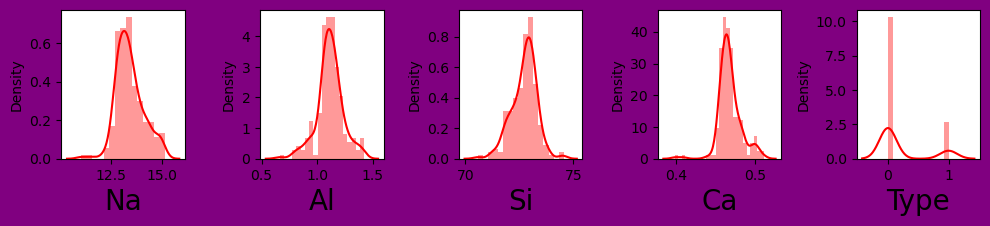

In [349]:
col = []
for i in dt.columns:
    col.append(i)
distplot(col, dt, 10, 4, 10, 2, 5, 20)

In [350]:
# Separating features and target

x = dt.drop('Type', axis = 1)

y = dt['Type']


In [351]:
x.shape

(193, 4)

In [352]:
y.shape

(193,)

In [353]:
y.value_counts()

0    153
1     40
Name: Type, dtype: int64

y classes are imbalanced

In [354]:
# let's use a resampling method to balance y.

! pip install imblearn
from imblearn.over_sampling import SMOTE

ST = SMOTE()
x1,y1 = ST.fit_resample(x,y)


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [355]:
y1.value_counts()

0    153
1    153
Name: Type, dtype: int64

In [356]:
x=x1

In [357]:
y=y1

In [358]:
y.value_counts()

0    153
1    153
Name: Type, dtype: int64

In [359]:
# standardise x
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
col = []
for i in x.columns:
    col.append(i)
x = pd.DataFrame(scaler.fit_transform(x), columns = col)
x

,Na,Al,Si,Ca
0,-0.012294,-1.053690,-1.881245,-0.111675
1,0.304008,-0.433781,-0.212750,-1.023001
2,-0.151466,-0.049726,0.243891,-1.076910
3,-0.556332,-0.592294,-0.423507,-0.618823
4,-0.480420,-0.709064,0.401959,-0.770954
...,...,...,...,...
301,1.442087,0.935093,0.304590,-0.274474
302,-0.286110,-0.071710,-1.094048,2.428242
303,-1.124996,0.478841,-0.126575,1.097908
304,1.014602,0.735138,1.109110,-0.349161


In [360]:
# correlation

dt.corr()

,Na,Al,Si,Ca,Type
Na,1.000000,0.174545,-0.227131,0.008414,0.468853
Al,0.174545,1.000000,0.337184,-0.268419,0.540749
Si,-0.227131,0.337184,1.000000,-0.143742,0.280568
Ca,0.008414,-0.268419,-0.143742,1.000000,0.237841
Type,0.468853,0.540749,0.280568,0.237841,1.000000


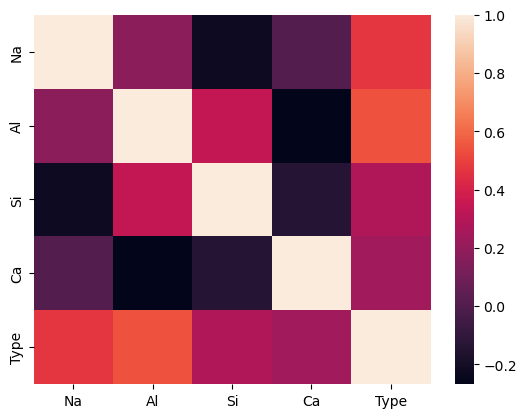

In [361]:
sns.heatmap(dt.corr())
plt.show()

In [362]:
x

,Na,Al,Si,Ca
0,-0.012294,-1.053690,-1.881245,-0.111675
1,0.304008,-0.433781,-0.212750,-1.023001
2,-0.151466,-0.049726,0.243891,-1.076910
3,-0.556332,-0.592294,-0.423507,-0.618823
4,-0.480420,-0.709064,0.401959,-0.770954
...,...,...,...,...
301,1.442087,0.935093,0.304590,-0.274474
302,-0.286110,-0.071710,-1.094048,2.428242
303,-1.124996,0.478841,-0.126575,1.097908
304,1.014602,0.735138,1.109110,-0.349161


In [363]:
x

,Na,Al,Si,Ca
0,-0.012294,-1.053690,-1.881245,-0.111675
1,0.304008,-0.433781,-0.212750,-1.023001
2,-0.151466,-0.049726,0.243891,-1.076910
3,-0.556332,-0.592294,-0.423507,-0.618823
4,-0.480420,-0.709064,0.401959,-0.770954
...,...,...,...,...
301,1.442087,0.935093,0.304590,-0.274474
302,-0.286110,-0.071710,-1.094048,2.428242
303,-1.124996,0.478841,-0.126575,1.097908
304,1.014602,0.735138,1.109110,-0.349161


In [364]:
# finding variance inflation in each column
from statsmodels.stats.outliers_influence import variance_inflation_factor

z = []

for i in range(len(x.columns)):
    z.append(variance_inflation_factor(x.values, i))
Vif = pd.DataFrame(z)

Vif['Features'] = x.columns
Vif.rename({Vif.columns[0]: 'VIF Values'}, axis = 'columns', inplace = True)


In [365]:
Vif

,VIF Values,Features
0,1.263144,Na
1,1.535177,Al
2,1.280265,Si
3,1.043425,Ca


In [366]:
# Modelling

In [367]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
import joblib
import pickle

Below I tried my own to find maximum accuracy but kept getting error. In order to complete the project, I just copy-pasted from fproject discussion. I will effort to build my own code after compelting this project

In [368]:
maxAccu = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print('Best accuracy is: ', maxAccu, 'at randome state: ', maxRs)


Best accuracy is:  1.0 at randome state:  13


In [377]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 13)

In [378]:
# training the data on each algorithm and CV

L = LogisticRegression()
R = RandomForestClassifier()
E = ExtraTreesClassifier()
G = GradientBoostingClassifier()
A = AdaBoostClassifier()
B = BaggingClassifier()
S = SVC()

Mod = [L,R,E,G,A,B,S]

for model in Mod:
    model.fit(x_train,y_train)
    pred_model = model.predict(x_test)
    acc = accuracy_score(y_test, pred_model)
    score = cross_val_score(model,x,y)
    print(accuracy_score(y_test, pred_model))
    print(confusion_matrix(y_test, pred_model))
    print(classification_report(y_test, pred_model))
    print(score)
    print(score.mean())
    print('The difference between accuracy score and cross validation score of ', model, 'is: ', accuracy_score(y_test, pred_model) - score.mean())
    print('\n')

0.9239130434782609
[[42  1]
 [ 6 43]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.88      0.92        49

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.92        92
weighted avg       0.93      0.92      0.92        92

[0.88709677 0.93442623 0.90163934 0.85245902 0.93442623]
0.9020095187731358
The difference between accuracy score and cross validation score of  LogisticRegression() is:  0.02190352470512502


0.9891304347826086
[[43  0]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.98      0.99        49

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92

[0.91935484 0.98360656 0.95081967 0.8852459  0.98360656]
0.9445267054468534
T

Our best model is BaggingClassifier()

In [379]:
# hyperperameter tuning 

from sklearn.model_selection import GridSearchCV

param_grid = {'max_features':[1,2,3],
             'random_state':[20,100,500],
             'bootstrap':[True,False],
             'n_jobs':[-1,0,1],
             'n_estimators':[20,50,100,150]}

In [380]:
SearchCV = GridSearchCV(BaggingClassifier(), param_grid = param_grid, cv = 5)
SearchCV.fit(x_train, y_train)
print('best estimator: ', SearchCV.best_estimator_)

best estimator:  BaggingClassifier(max_features=1, n_estimators=20, n_jobs=-1, random_state=20)


In [381]:
my_model = BaggingClassifier(max_features=1, n_estimators=20, n_jobs=-1, random_state=20)
my_model.fit(x_train, y_train)
pred = my_model.predict(x_test)
print('Acuuracy Score=', (accuracy_score(y_test, pred))*100) 


Acuuracy Score= 82.6086956521739


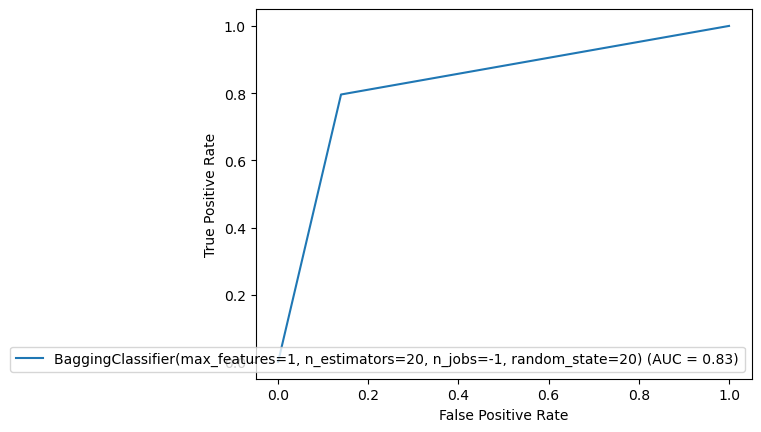

In [382]:
# ROC curve
a, b, thresholds = metrics.roc_curve(y_test, pred)
f = metrics.auc(a, b)
display = metrics.RocCurveDisplay(fpr=a, tpr=b, roc_auc = f, estimator_name = my_model)
display.plot()
plt.show()

In [383]:
pickle.dump(my_model, open('Glass_id_Romuald.pkl', 'wb'))

In [384]:
saved_model = pickle.load(open('Glass_id_Romuald.pkl', 'rb'))

In [385]:
saved_model.predict(x_test)

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0])

In [386]:
y_test

68     0
127    0
46     0
193    1
107    0
      ..
18     0
186    1
5      0
302    1
78     0
Name: Type, Length: 92, dtype: int64